In [40]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,PowerTransformer
pt = PowerTransformer()

In [72]:
df=pd.read_csv('C:\\Users\\Nidhi\\Downloads\\shopping_data.csv')

In [73]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
df.drop(['CustomerID','Genre'],axis=1,inplace = True)

In [75]:
df.drop('Age',axis=1,inplace = True)

In [76]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


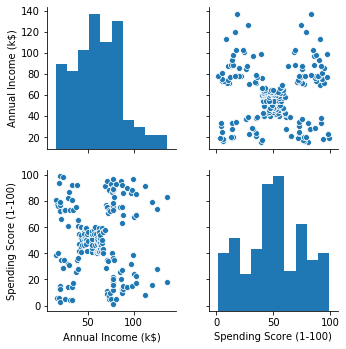

In [46]:
sns.pairplot(df)

In [77]:
pt=PowerTransformer()
df_sc=pd.DataFrame(pt.fit_transform(df),columns=df.columns)
df_sc.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.989930,-0.385308
1,-1.989930,1.164467
2,-1.930366,-1.820424
3,-1.930366,1.023549
4,-1.872032,-0.346103


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil
ssd=[]
score=[]
for i in range(2,10):
    km=KMeans(n_clusters=i,random_state=10)
    km.fit(df_sc)
    ssd.append(km.inertia_)
    ss=sil(df_sc,km.labels_)
    score.append(ss)

In [49]:
ssd

[266.8920508510826,
 164.13175129170781,
 108.74395192455353,
 61.264301145926865,
 52.260734047869406,
 44.89789200643832,
 37.67221879645411,
 32.37687372284104]

In [50]:
score

[0.30524134048596985,
 0.44897807908120924,
 0.4983534404682616,
 0.5616851362986932,
 0.4651098982552434,
 0.4539919205886024,
 0.44406372858567694,
 0.44747743321001643]

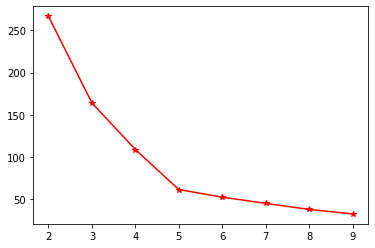

In [51]:
plt.plot(range(2,10),ssd,marker='*',color='r')

In [52]:
#k=5
km=KMeans(n_clusters=5,random_state=10)
km.fit(df_sc)
cendroi=km.cluster_centers_
cendroi

array([[-1.42201891,  1.10336508],
       [-0.14644306,  0.00453909],
       [-1.45022752, -1.21572107],
       [ 0.97265491,  1.20116211],
       [ 1.02744075, -1.31331302]])

In [53]:
df_sc['cluster']=km.labels_

In [54]:
df_sc.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.989930,-0.385308,2
1,-1.989930,1.164467,0
2,-1.930366,-1.820424,2
3,-1.930366,1.023549,0
4,-1.872032,-0.346103,2


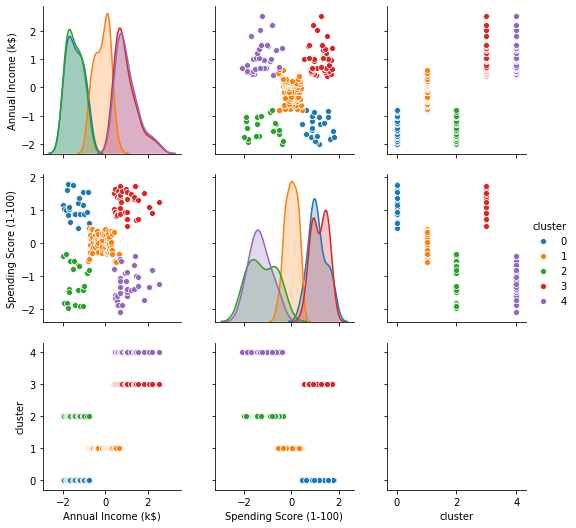

In [55]:
sns.pairplot(df_sc,diag_kind='kde',hue='cluster')

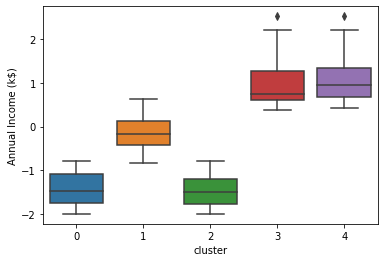

In [56]:
sns.boxplot(x='cluster',y='Annual Income (k$)',data=df_sc)

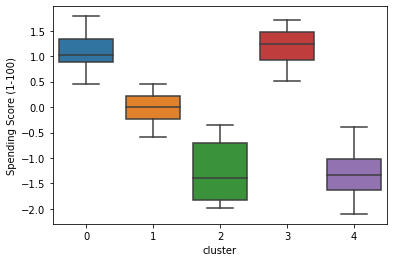

In [57]:
sns.boxplot(x='cluster',y='Spending Score (1-100)',data=df_sc)

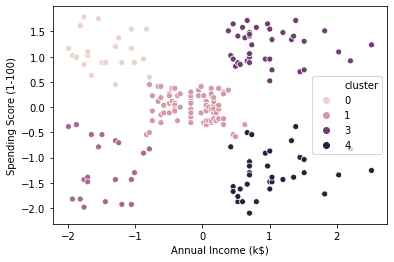

In [58]:
sns.scatterplot(x=df_sc['Annual Income (k$)'],y=df_sc['Spending Score (1-100)'],hue=df_sc['cluster'])

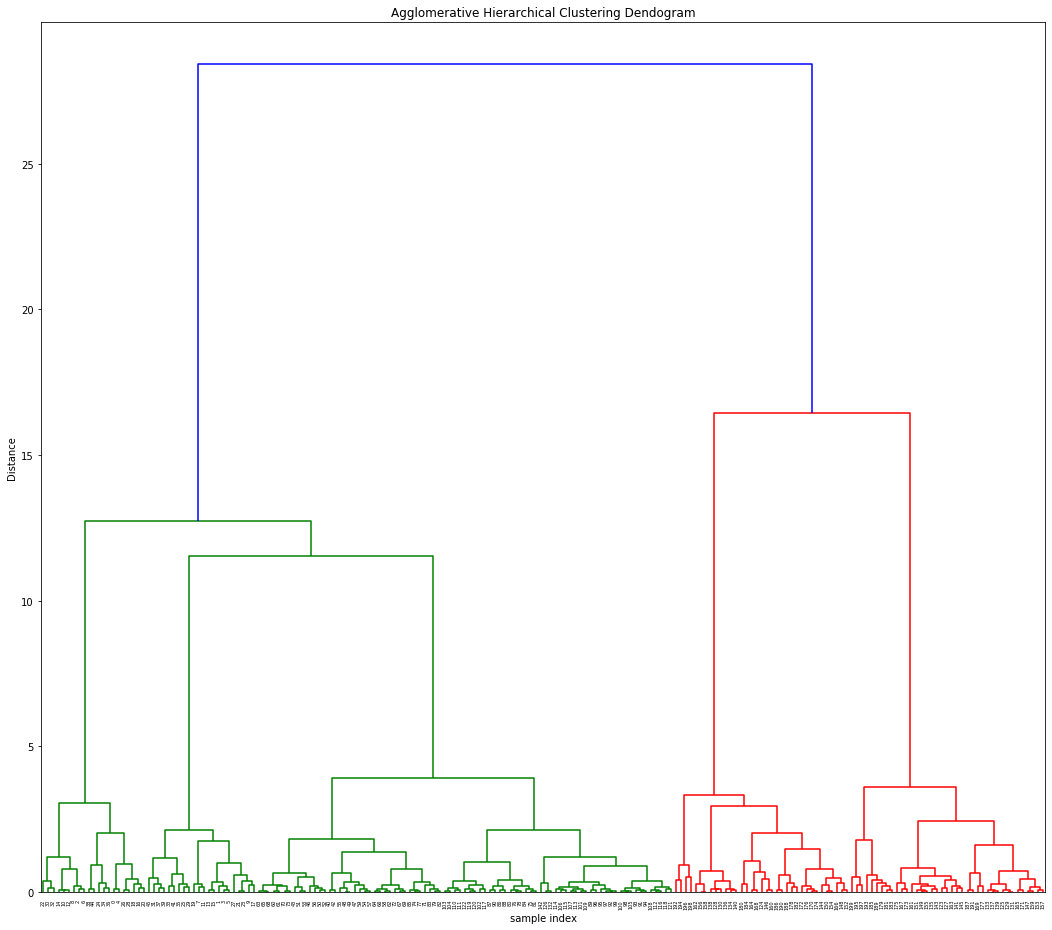

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_sc, 'ward')
dendrogram(Z)
plt.show()

In [82]:
from scipy.cluster.hierarchy import cut_tree
clester_cut=pd.Series(cut_tree(Z,n_clusters=3).reshape(-1,))
clester_cut.value_counts()

0    126
1     39
2     35
dtype: int64

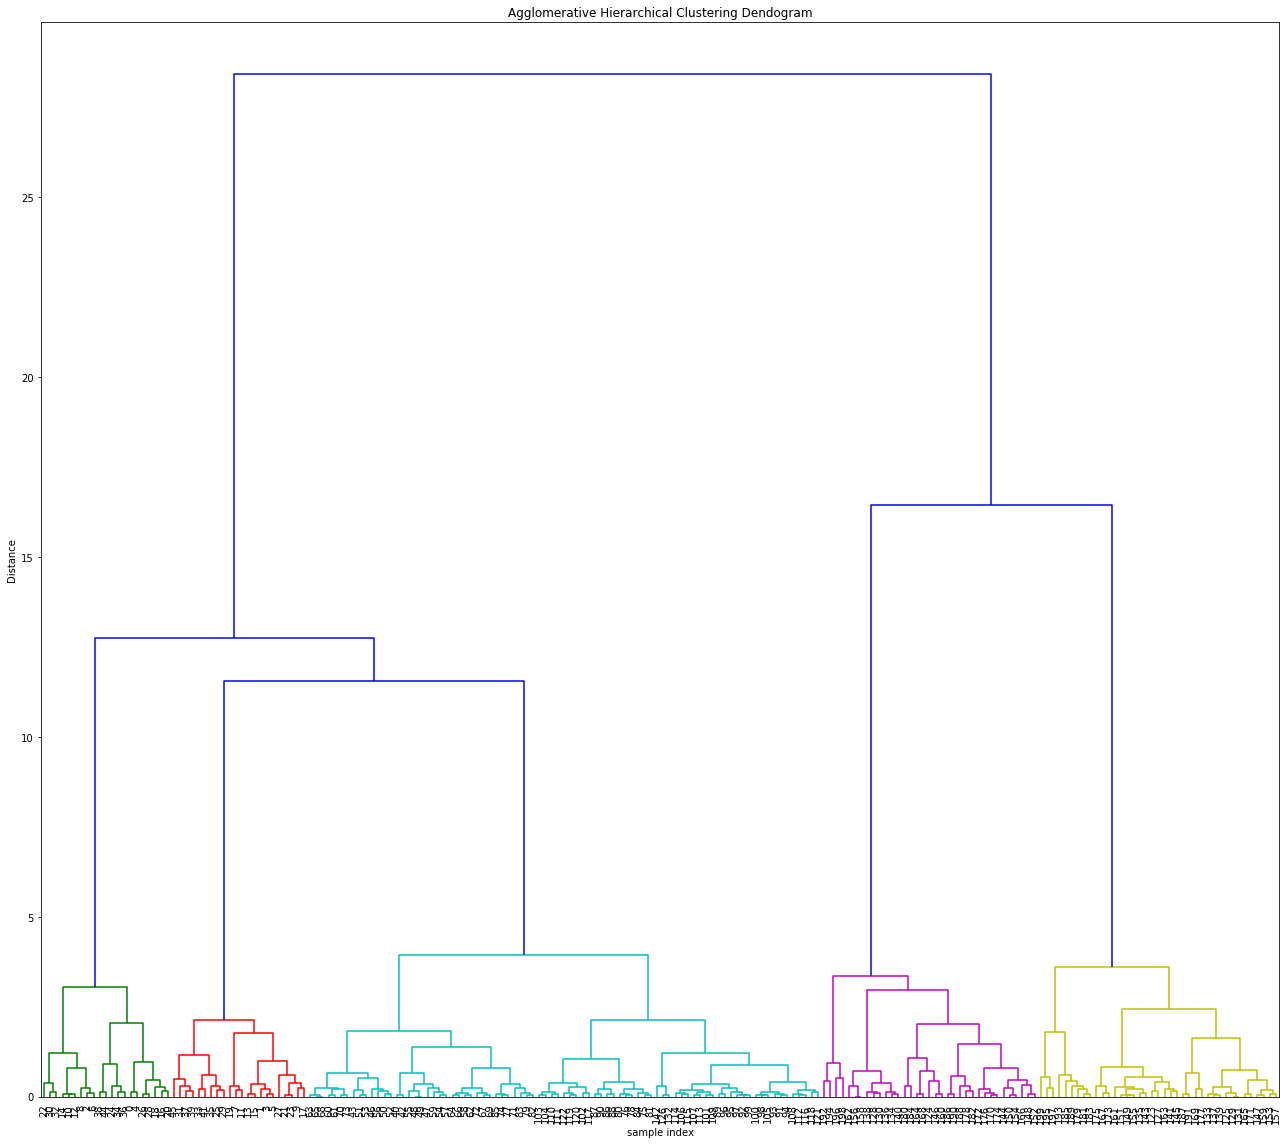

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_sc, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=30,color_threshold=10,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [79]:
df_sc.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.989930,-0.385308
1,-1.989930,1.164467
2,-1.930366,-1.820424
3,-1.930366,1.023549
4,-1.872032,-0.346103


In [84]:
df_sc['culster_tree']=clester_cut.values
df_sc

,Annual Income (k$),Spending Score (1-100),culster_tree
0,-1.989930,-0.385308,0
1,-1.989930,1.164467,0
2,-1.930366,-1.820424,0
3,-1.930366,1.023549,0
4,-1.872032,-0.346103,0
...,...,...,...
195,2.027774,1.094146,1
196,2.202670,-0.827902,2
197,2.202670,0.917116,1
198,2.515898,-1.254103,2


In [85]:
df_sc.groupby('culster_tree').agg('mean')

,Annual Income (k$),Spending Score (1-100)
culster_tree,,
0,-0.586460,-0.006979
1,0.972655,1.201162
2,1.027441,-1.313313
